<a href="https://colab.research.google.com/github/ginni0002/Cats-v-s-Dogs-Classifier/blob/main/Cats_v_s_Dogs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cats classifier(cat or no cat)


In [ ]:
import tensorflow as tf



gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024),
         tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Virtual devices cannot be modified after being initialized


In [ ]:
!pip install kaggle


In [1]:

from google.colab import files
files.upload()    

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khushharman","key":"e5b87f1226e1d4b057b6f683bf176dee"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json    

In [3]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

 98% 804M/817M [00:10<00:00, 81.1MB/s]
100% 817M/817M [00:10<00:00, 83.0MB/s]


In [4]:
!ls ./*

./dogs-vs-cats.zip  ./kaggle.json

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip','r')
zip_ref.extractall('dogs-vs-cats')
zip_ref.close()


this is just some random stuff below


In [ ]:
import os
# print(len([name for name in os.listdir("./dogs-vs-cats/train/train/")]))
# l1=[]
# !ls ./dogs-vs-cats/train/train/cat.0.jpg | cut -b 28-30 | grep "***"



import subprocess
proc=subprocess.Popen('ls ./dogs-vs-cats/train/train/cat.0.jpg | cut -b 28-30 | grep "***" ', shell=True, stdout=subprocess.PIPE, )
output=proc.communicate()[0]
print(output[0:3])


b'cat'


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import glob
from PIL import Image

In [7]:

classes = ["dog" , "cat"]
train_paths = []
train_labels=[]
test_paths=[]
test_labels=[]

train_path = "./dogs-vs-cats/train/train"
test_path = "./dogs-vs-cats/test/test"



for file in glob.iglob(train_path+"/*.jpg"):
      train_paths.append(file)
      if str(file)[27:30] == "cat":
        train_labels.append(0)
      else:
        train_labels.append(1)
      

random.seed(100)
random.shuffle(train_paths)
random.seed(100)
random.shuffle(train_labels)
test_paths = train_paths[round(len(train_paths)*0.9):]
test_labels = train_labels[round(len(train_labels)*0.9):]

print("train_paths :" , train_paths[0:5])
print("train_labels",train_labels[0:5])
print("test_paths",test_paths[0:5])
print("test_labels",test_labels[0:5])

#The labels are matching with the paths so its a good thing ig :)

train_paths : ['./dogs-vs-cats/train/train/cat.5011.jpg', './dogs-vs-cats/train/train/dog.1957.jpg', './dogs-vs-cats/train/train/cat.11732.jpg', './dogs-vs-cats/train/train/dog.9262.jpg', './dogs-vs-cats/train/train/cat.6960.jpg']
train_labels [0, 1, 0, 1, 0]
test_paths ['./dogs-vs-cats/train/train/cat.6907.jpg', './dogs-vs-cats/train/train/dog.8714.jpg', './dogs-vs-cats/train/train/dog.7707.jpg', './dogs-vs-cats/train/train/cat.1171.jpg', './dogs-vs-cats/train/train/dog.7782.jpg']
test_labels [0, 1, 1, 0, 1]


## Data Generator

In [8]:
def data_gen(batch_size , train_paths , train_labels):
    
    i = 0
    while True:

        train_batch = []
        labels_batch = []
        path = ""
        for ch in range(batch_size):
            path = train_paths[i]
            image = Image.open(path)

            image = image.resize((256,256))
            
            image = np.array(image)
            image = image/255.0
            

            train_batch.append(image)

            labels_batch.append([train_labels[i]])


            i+=1

            if i == len(train_paths)-1:
                i = 0
            

        train_batch = np.array(train_batch)
        labels_batch = np.array(labels_batch)
        yield (train_batch , labels_batch)
        #return (train_batch , labels_batch)



In [ ]:
(train_images , labels) = data_gen(32 , train_paths , train_labels)
plt.imshow(train_images[0])
print(labels[0])
plt.show()

ValueError: ignored

### Creating a Model

In [9]:
def Create_Model(width = 256 , height = 256 , depth = 3 , batch_size = 32):

    my_inputs = layers.Input(shape = (width , height , depth))
    x = layers.Conv2D(32 , strides = (1,1) , padding = "same" , kernel_size = (5,5), kernel_initializer = "he_uniform" )(my_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(128 , strides = (1,1) , padding = "same" , kernel_size = (3,3) , kernel_initializer = "he_uniform")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(256 , strides = (1,1) , padding = "same" , kernel_size = (3,3) , kernel_initializer = "he_uniform")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(512 , strides = (1,1) , padding = "same" , kernel_size = (3,3) , kernel_initializer = "he_uniform")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(1024 , strides = (1,1) , padding = "same" , kernel_size = (3,3) , kernel_initializer = "he_uniform")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    
    x = layers.Flatten()(x)

    x = layers.Dense(512 , kernel_initializer = "he_uniform")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)


    x = layers.Dense(1 , kernel_initializer = "glorot_uniform")(x)
    x = layers.BatchNormalization()(x)
    my_outputs = layers.Activation("sigmoid")(x)

    my_model = keras.Model(inputs = my_inputs , outputs = my_outputs)


    return my_model

    


In [10]:
model = Create_Model(256 , 256 , 3 , 32)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512   

In [11]:
optimizer = keras.optimizers.Adam(learning_rate=0.1, beta_1 = 0.9 , beta_2 = 0.999 , epsilon = 5e-07 , name = "Adam")

In [12]:
model.compile(optimizer = optimizer , loss = "binary_crossentropy" , metrics = ['accuracy']   )

In [13]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18393472354452677574, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4998712605254636792
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
batch_size = 32
epochs = 30
train_steps = 700
test_steps = 80   


train_gen = data_gen(batch_size , train_paths , train_labels)
test_gen = data_gen(batch_size , test_paths , test_labels)

model.fit(x = train_gen , 
          batch_size = batch_size ,
          epochs = epochs ,
          verbose = 1,
          validation_data = test_gen, 
          steps_per_epoch = train_steps,
          validation_steps=test_steps,
          validation_batch_size = batch_size)


Epoch 1/30
700/700 [==============================] - 216s 259ms/step - loss: 0.5870 - accuracy: 0.6751 - val_loss: 0.5216 - val_accuracy: 0.7437
Epoch 2/30
633/700 [==========================>...] - ETA: 15s - loss: 0.4365 - accuracy: 0.7954

# Saving the model

In [ ]:
!mkdir -p saved_model
model.save("saved_model/model")

# making predictions using our model 

dogs-vs-cats/test/test/8504.jpg


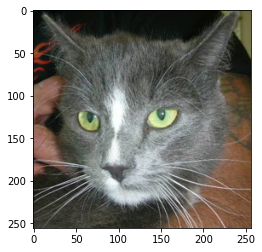

UnboundLocalError: ignored

In [ ]:
model = tf.keras.models.load_model()
val_paths=[]  
val_path ="dogs-vs-cats/test/test"
for file in glob.iglob(val_path+"/*.jpg"):
        val_paths.append(file)
print(val_paths[19])


def val_data_gen(val_paths):
        i=0
        list1=[]
        for path in val_paths[:10]:
            img = Image.open(path)
            img = img.resize((256,256))
            plt.imshow(img)
            plt.show()

            img = np.array(img)
            img = img/255.0
            img = np.expand_dims(img , axis = 0)
            predictions = model.predict(img)
            predictions[0][0] = round(predictions[0][0])
            list1.append(img)
            i+=1
            if i == len(val_paths)-1:
              i=0
        list1 = np.array(list1)
        return list1

list2=val_data_gen(val_paths)
print(list2)
# print(list2[0][0][0])
# round_pred =[]
# for ch in list2:
 #  round_pred.append(round(ch[0][0]))

# print(round_pred)

#predictions = model.predict_generator(val_data_gen(val_paths),len(val_paths)//38)
# val_pred = [round(ch[0]) for ch in predictions]
# print(val_pred)
# img = Image.open(val_paths[0])



# for file in glob.iglob(val_path+"/*.jpg"):
#        val_paths.append(file)
#  print(val_paths[19])
#  list1=[]
#  def val_data_gen(val_paths):
#      i=0
#      for ch in val_paths:
#        img = Image.open(ch)
#        img = img.resize((256,256))
#        img = np.array(img)
#        list1.append(img)
#      return list1
#  predictions = model.predict(val_data_gen(val_paths))
#  list1 = []
#  for ch in predictions:
#    if round(predictions) == 0:
#        list2.append("cat")
#    else:
#        list2.append("dog")